# Analyses of wheel states

In [1]:

""" 
IMPORTS
"""
import os
import autograd.numpy as np
import pickle
import seaborn as sns
from collections import defaultdict
import pandas as pd
from matplotlib import colors as mcolors
from one.api import ONE
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer
import collections

# --Machine learning and statistics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.cluster import KMeans
import umap

# one = ONE(base_url='https://alyx.internationalbrainlab.org')
one = ONE(mode='remote')

In [2]:
functions_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability//Models/Sub-trial/4_analyses/'
functions_path = '/home/ines/repositories/representation_learning_variability//Models/Sub-trial/4_analyses/'
os.chdir(functions_path)
states_trial_type = pd.read_pickle("./states_trial_type.pkl")
extended = pd.read_pickle("./mouse_movements_df.pkl")
extended_short = extended[['trial_id', 'Bin', 'session', 'virtual_response', 'ballistic']]

In [3]:
merged = states_trial_type.merge(extended_short, on=['trial_id', 'Bin', 'session']).drop_duplicates()


In [4]:
all_mice = merged.copy()
check_states = np.array(merged['identifiable_states'])
on = [s[0] == '1' for s in check_states]
all_mice['wheel_on'] = np.zeros(len(all_mice))
all_mice['wheel_on'][on] = 1
use_data = all_mice.loc[all_mice['wheel_on']==1]

vars = ['session', 'broader_label', 'ballistic']
# Step 1: Group and count occurrences
count = pd.DataFrame(use_data.groupby(vars)['ballistic'].count())  #  'correct',

# Step 2: Reset index to bring the grouping columns back into the DataFrame
count = count.reset_index(level=list(np.arange(0, len(vars)-1, 1)))

# Rename the count column
count.rename(columns={'ballistic': 'count'}, inplace=True)

# Step 3: Calculate the total counts for each group of 'mouse_name', 'session', 'label'
# count['total'] = count.groupby(vars[:-1])['count'].transform('sum')  # 'broader_label'
count['total'] = count.groupby(['session'])['count'].transform('sum')  # 'broader_label'

# Step 4: Compute the relative frequency
count['relative_frequency'] = count['count'] / count['total']

# Drop the 'total' column if it's no longer needed
# count = count.drop(columns=['total'])

/tmp/ipykernel_19032/2065545919.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_mice['wheel_on'][on] = 1


In [5]:
all_mice = merged.copy()
check_states = np.array(merged['identifiable_states'])
on = [s[0] == '1' for s in check_states]
all_mice['wheel_on'] = np.zeros(len(all_mice))
all_mice['wheel_on'][on] = 1
use_data = all_mice.loc[all_mice['wheel_on']==1]

vars = ['session', 'broader_label', 'ballistic']
# Step 1: Group and count occurrences
count = pd.DataFrame(use_data.groupby(vars)['ballistic'].count())  #  'correct',

# Step 2: Reset index to bring the grouping columns back into the DataFrame
count = count.reset_index(level=list(np.arange(0, len(vars)-1, 1)))

# Rename the count column
count.rename(columns={'ballistic': 'count'}, inplace=True)

# Step 3: Calculate the total counts for each group of 'mouse_name', 'session', 'label'
# count['total'] = count.groupby(vars[:-1])['count'].transform('sum')  # 'broader_label'
count['total'] = count.groupby(['session'])['count'].transform('sum')  # 'broader_label'

# Step 4: Compute the relative frequency
count['relative_frequency'] = count['count'] / count['total']

# Drop the 'total' column if it's no longer needed
# count = count.drop(columns=['total'])

/tmp/ipykernel_19032/2065545919.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_mice['wheel_on'][on] = 1


/tmp/ipykernel_19032/3333840691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data['broader_label'] = pd.Categorical(use_data['broader_label'], categories=labels)


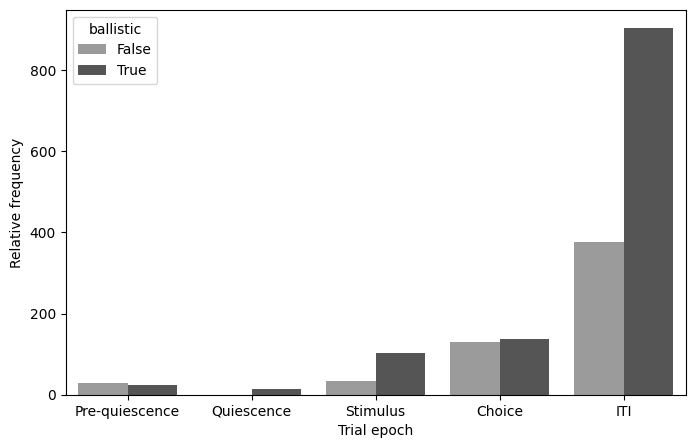

In [10]:

labels = ['Pre-quiescence', 'Quiescence', 'Stimulus', 'Choice', 'ITI']
colors = sns.color_palette('tab10')[0:2]
use_data['broader_label'] = pd.Categorical(use_data['broader_label'], categories=labels)
fig, ax = plt.subplots(figsize=(8, 5))
colors = [sns.color_palette("Greys", as_cmap=False)[3],
                 sns.color_palette("Greys", as_cmap=False)[5]]
sns.barplot(x='broader_label', y='count', data=use_data, palette=colors, hue='ballistic', alpha=0.8)
plt.xlabel('Trial epoch')
plt.ylabel('Relative frequency')
# plt.xticks(rotation=45, ha='right')
# plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()
# except:
#        print(session)

/tmp/ipykernel_29481/3654146952.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mouse_data['wheel_on'] = np.zeros(len(mouse_data))
/tmp/ipykernel_29481/3654146952.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mouse_data['wheel_on'][on] = 1
/tmp/ipykernel_29481/3654146952.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

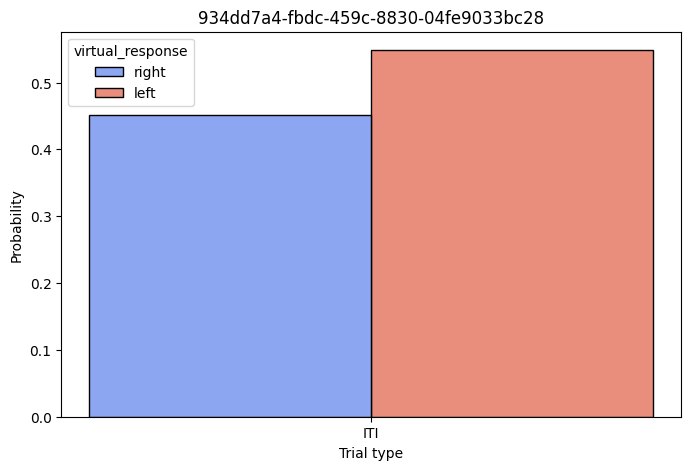

In [8]:
for s, session in enumerate(merged.session.unique()[0:1]):
       #try:
       session = '934dd7a4-fbdc-459c-8830-04fe9033bc28'
       mouse_data = merged.loc[merged['session']==session]
       check_states = np.array(mouse_data['identifiable_states'])
       on = [s[0] == '1' for s in check_states]
       mouse_data['wheel_on'] = np.zeros(len(mouse_data))
       mouse_data['wheel_on'][on] = 1
       mouse_data.loc[mouse_data['virtual_response']==-1,'virtual_response'] = 'right'
       mouse_data.loc[mouse_data['virtual_response']==1,'virtual_response'] = 'left'

       labels = ['Pre-quiescence', 'Quiescence', 'Stimulus', 'Choice', 'ITI']
       colors = sns.color_palette('tab10')[0:2]
       colors = [(0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885)]
       use_data = mouse_data.loc[(mouse_data['wheel_on']==1) &
                                 (mouse_data['label'].isin(['ITI']))]
       use_data['broader_label'] = pd.Categorical(use_data['broader_label'], categories=labels)
       use_data['label'] = pd.Categorical(use_data['label'], categories=labels)
       fig, ax = plt.subplots(figsize=(8, 5))

       sns.histplot(x='label', data=use_data, hue='virtual_response', multiple='dodge', stat='probability', palette=colors)
       plt.xlabel('Trial type')
       # plt.xticks(rotation=45, ha='right')
       # plt.legend(bbox_to_anchor=(1.1, 1.05))
       plt.title(session)
       plt.show()
       # except:
       #        print(session)

In [9]:
import seaborn as sns
sns.color_palette("Greys", as_cmap=False)

[(0.9295040369088812, 0.9295040369088812, 0.9295040369088812),
 (0.819115724721261, 0.819115724721261, 0.819115724721261),
 (0.6770011534025375, 0.6770011534025375, 0.6770011534025375),
 (0.5085736255286428, 0.5085736255286428, 0.5085736255286428),
 (0.35912341407151094, 0.35912341407151094, 0.35912341407151094),
 (0.1679354094579008, 0.1679354094579008, 0.1679354094579008)]

/tmp/ipykernel_29481/3846920322.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mouse_data['wheel_on'] = np.zeros(len(mouse_data))
/tmp/ipykernel_29481/3846920322.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mouse_data['wheel_on'][on] = 1
/tmp/ipykernel_29481/3846920322.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

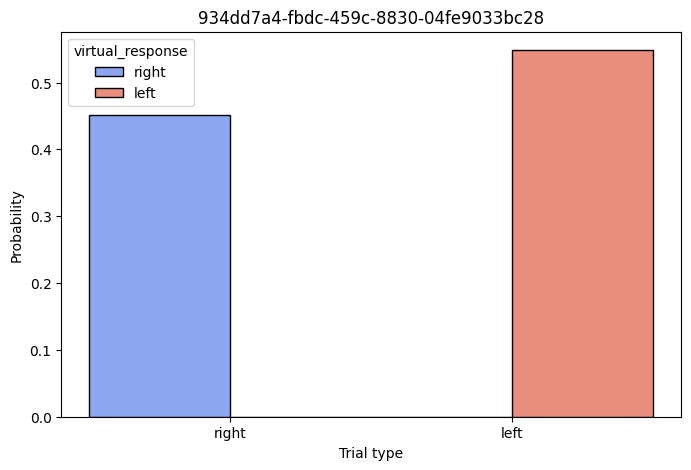

In [10]:
for s, session in enumerate(merged.session.unique()[0:1]):
       #try:
       session = '934dd7a4-fbdc-459c-8830-04fe9033bc28'
       mouse_data = merged.loc[merged['session']==session]
       check_states = np.array(mouse_data['identifiable_states'])
       on = [s[0] == '1' for s in check_states]
       mouse_data['wheel_on'] = np.zeros(len(mouse_data))
       mouse_data['wheel_on'][on] = 1
       mouse_data.loc[mouse_data['virtual_response']==-1,'virtual_response'] = 'right'
       mouse_data.loc[mouse_data['virtual_response']==1,'virtual_response'] = 'left'

       labels = ['Pre-quiescence', 'Quiescence', 'Stimulus', 'Choice', 'ITI']
       colors = sns.color_palette('tab10')[0:2]
       colors = [(0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885)]
       use_data = mouse_data.loc[(mouse_data['wheel_on']==1) &
                                 (mouse_data['label'].isin(['ITI']))]
       use_data['broader_label'] = pd.Categorical(use_data['broader_label'], categories=labels)
       use_data['label'] = pd.Categorical(use_data['label'], categories=labels)
       fig, ax = plt.subplots(figsize=(8, 5))

       sns.histplot(x='choice', data=use_data, hue='virtual_response', multiple='dodge', stat='probability', palette=colors)
       plt.xlabel('Trial type')
       # plt.xticks(rotation=45, ha='right')
       # plt.legend(bbox_to_anchor=(1.1, 1.05))
       plt.title(session)
       plt.show()
       # except:
       #        print(session)

/tmp/ipykernel_29481/1538019522.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mouse_data['wheel_on'] = np.zeros(len(mouse_data))
/tmp/ipykernel_29481/1538019522.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mouse_data['wheel_on'][on] = 1
/tmp/ipykernel_29481/1538019522.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

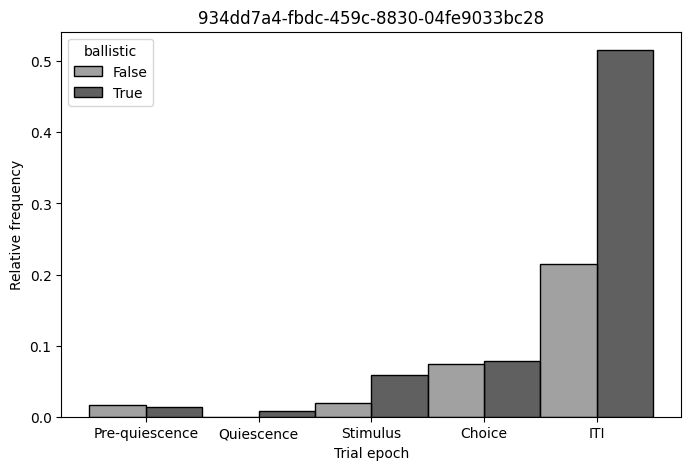

In [11]:

for s, session in enumerate(merged.session.unique()[0:1]):
       try:
              session = '934dd7a4-fbdc-459c-8830-04fe9033bc28'
              mouse_data = merged.loc[merged['session']==session]
              check_states = np.array(mouse_data['identifiable_states'])
              on = [s[0] == '1' for s in check_states]
              mouse_data['wheel_on'] = np.zeros(len(mouse_data))
              mouse_data['wheel_on'][on] = 1
              colors = [sns.color_palette("Greys", as_cmap=False)[3],
                 sns.color_palette("Greys", as_cmap=False)[5]]
              labels = ['Pre-quiescence', 'Quiescence', 'Stimulus', 'Choice', 'ITI']
              use_data = mouse_data.loc[(mouse_data['wheel_on']==1)]
              use_data['broader_label'] = pd.Categorical(use_data['broader_label'], categories=labels)
              fig, ax = plt.subplots(figsize=(8, 5))

              sns.histplot(x='broader_label', data=use_data, hue='ballistic', multiple='dodge', palette=colors, stat='probability')
              plt.xlabel('Trial epoch')
              plt.ylabel('Relative frequency')
              # plt.xticks(rotation=45, ha='right')
              # plt.legend(bbox_to_anchor=(1.1, 1.05))
              plt.title(session)
              plt.show()
       except:
              print(session)